## reference:
https://www.amazon.com/stores/Poornachandra-Sarang/author/B08PL7FBQZ?ref=ap_rdr&isDramIntegrated=true&shoppingPortalEnabled=true

In [101]:
#page 71

Consider now that the bank has 
approached you to develop a ML prediction model which provides them 
some insights on the likelihood of the customer leaving the bank. In the 
financial terms, this is called churning. Having the knowledge that a 
certain customer may leave the bank in the near future, the bank can take 
some preventive measures to retain the customer.
The problem that you are trying to solve is to develop a binary 
classification model. You will use TensorFlow’s deep learning library and 
will make use of Keras high-level API for implementing the model

In [102]:
# imports

In [103]:
# %tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

In [104]:
#loading data
import pandas as pd

#scaling feature values
from sklearn.preprocessing import StandardScaler

#encoding target values
from sklearn.preprocessing import LabelEncoder

#shuffling data
from sklearn.utils import shuffle

#splitting the dataset into training and validation
from sklearn.model_selection import train_test_split

#plotting curves
import matplotlib.pyplot as plt

data_url ='https://raw.githubusercontent.com/Apress/artificial-neural-networks-with-tensorflow-2/main/ch02/Churn_Modelling.csv'
* data=pd.read_csv(data_url)

In [105]:
data_url ='https://raw.githubusercontent.com/Apress/artificial-neural-networks-with-tensorflow-2/main/ch02/Churn_Modelling.csv'
data=pd.read_csv(data_url)

In [106]:
# # data from directory
# data = pd.read_csv('5-Churn_Modelling.csv')

In [107]:
# For better machine learning, you should randomize the data so that the learning does not 
# follow the undesired patterns in the data. So, we shuffle the data using the 
# following statement:
data=shuffle(data)

In [108]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
358,359,15633950,Yen,737,France,Male,41,1,101960.74,1,1,1,123547.28,0
5751,5752,15690731,Wolfe,645,France,Male,40,6,131411.24,1,1,1,194656.11,0
989,990,15681206,Hsing,722,France,Female,49,3,168197.66,1,1,0,140765.57,1
3035,3036,15687491,Nkemdilim,817,Germany,Male,45,9,101207.75,1,0,0,88211.12,1
6695,6696,15615473,Sabbatini,646,France,Female,33,2,0.00,2,0,0,198208.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6084,6085,15619494,Abdulov,562,Germany,Female,31,9,117153.00,1,1,1,108675.01,0
4035,4036,15792607,Little,769,France,Female,38,2,0.00,2,0,0,75578.67,0
3352,3353,15767414,Calabresi,591,France,Male,40,2,99886.42,2,1,1,88695.19,0
9015,9016,15597385,Siddons,573,Spain,Male,41,5,0.00,2,0,1,14479.29,0


### There are 10,000 rows and 14 columns in the database. A brief 
explanation of the various fields is given here:

*  RowNumber – Numbers from 1 to 10,000.
* Surname – Customer’s last name.
* CreditScore – Customer’s credit score.
* Geography – Customer’s country.
* Gender – Male or female.
* Age – Customer’s age.
* Tenure – How long the customer is banking with them?
* Balance – Customer’s bank balance.
* NumOfProducts – The count of bank products the customer is currently using.
* HasCrCard – Does the customer hold a credit card?
* IsActiveMember – Is the customer currently active?
* EstimatedSalary – Customer’s current estimated salary.
*  Exited – A value of 1 indicates that the customer has left the bank.

# cleaning preprocessing

In [109]:
## Checking Nulls
data.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [110]:
#Very clearly, our dataset does not contain any null values

# Selecting Features and Labels


In [111]:
# drop the useless features
X = data.drop(labels=['CustomerId', 'Surname', 'RowNumber', 'Exited'], axis = 1)

In [112]:
# target
y = data['Exited']


# Encoding Categorical Columns


In [113]:
X.dtypes


CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [114]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
358,737,France,Male,41,1,101960.74,1,1,1,123547.28
5751,645,France,Male,40,6,131411.24,1,1,1,194656.11
989,722,France,Female,49,3,168197.66,1,1,0,140765.57
3035,817,Germany,Male,45,9,101207.75,1,0,0,88211.12
6695,646,France,Female,33,2,0.00,2,0,0,198208.00


In [115]:
#convert categoricalto numerical
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
X['Geography'] = label.fit_transform(X['Geography'])
X['Gender'] = label.fit_transform(X['Gender'])

In [116]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
358,737,0,1,41,1,101960.74,1,1,1,123547.28
5751,645,0,1,40,6,131411.24,1,1,1,194656.11
989,722,0,0,49,3,168197.66,1,1,0,140765.57
3035,817,1,1,45,9,101207.75,1,0,0,88211.12
6695,646,0,0,33,2,0.00,2,0,0,198208.00


In [117]:
X['Geography'].unique()

array([0, 1, 2])

In [118]:
X.shape

(10000, 10)

In [119]:
#The one-hot encoding creates dummy variables for categorical columns.

* As Geography column has three distinct values, it will create three variables – one for each country. 
* Thus, we will have three features pertaining to the country in our training dataset

* Having many features increases the training time. 
* To reduce the number of features, you can exclude one of the dummy variables pertaining to the country field and yet 
* achieve the same results. 
* We drop the first variable by calling get_dummies method

In [120]:
X = pd.get_dummies(X, drop_first=True, columns=['Geography'])
X.shape

(10000, 11)

In [121]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2
358,737,1,41,1,101960.74,1,1,1,123547.28,False,False
5751,645,1,40,6,131411.24,1,1,1,194656.11,False,False
989,722,0,49,3,168197.66,1,1,0,140765.57,False,False
3035,817,1,45,9,101207.75,1,0,0,88211.12,True,False
6695,646,0,33,2,0.00,2,0,0,198208.00,False,False


In [122]:
# X['Geography'].unique()
# Geography has beenconverted to eography_1	Geography_2

# Scaling Numerical Values
* Scaling to -1 to 1


In [123]:
# z=  = (x - mu) / s
# mu is the mean and s is standard deviation
# This standardization is performed by using the StandardScaler function of sklearn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)


In [124]:
#  Split dataset into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [125]:
# determine number of features:
X_train.shape[1]


11

In [126]:
model = keras.models.Sequential()


In [127]:
# first layer
# The input dimension to this layer is set in the parameter input_dim, 
# which is the number of features defined by the shape of X_train vector

model.add(keras.layers.Dense(128, activation = 'relu', input_dim = X_train.shape[1]))

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### The activation function is used in deciding whether the node is to be activated depending on its weighted sum
ReLU is the most widely used activation function that 
outputs 0 for negative inputs and 1 otherwise.

In [128]:
# second layer
# The input to this layer comes from the previous layer so there is no need to specify the dimensions of the input vector

model.add(keras.layers.Dense(64, activation = 'relu'))


In [129]:
# 3th layer

model.add(keras.layers.Dense(32, activation = 'relu'))


In [130]:
# last layer
# we use sigmoid as the activation function here as this layer is outputting a binary value

model.add(keras.layers.Dense(1, activation = 'sigmoid'))


#### A sigmoid function is a type of activation function and is also known as a squashing function.
* A squashing function limits the output to a range between 0 and 1, making it suitable in predicting probabilities

In [131]:
# observe the model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

# Compiling Model


In [132]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

* As the model that we are developing is a binary classifier, we use the binary_crossentropy as our loss function

### about optimizer
* We use Adam optimizer while training the model as this is suited best in such situations. 
* Later on after the training, if you are not satisfied with the model’s performance, you may experiment with other optimizers

# tensorboard

In [133]:
# To clear the earlier log, we use the following action: (in vs code)
# !rm -rf ./log/
# or
#rm ./log

In [134]:
#tensorboard visualization
import datetime, os

logdir = os.path.join("log", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq = 1)

In [135]:
# With this setup for training analysis and the compilation of the model, 
# we are now ready to start the training.

# Model Training


In [136]:
r = model.fit(X_train, y_train, batch_size = 32, epochs = 50,
              validation_data = (X_test, y_test), callbacks = [tensorboard_callback])

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8033 - loss: 0.4627 - val_accuracy: 0.8437 - val_loss: 0.3846
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8521 - loss: 0.3587 - val_accuracy: 0.8570 - val_loss: 0.3547
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8628 - loss: 0.3263 - val_accuracy: 0.8543 - val_loss: 0.3526
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8688 - loss: 0.3265 - val_accuracy: 0.8557 - val_loss: 0.3482
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8638 - loss: 0.3309 - val_accuracy: 0.8527 - val_loss: 0.3548
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8713 - loss: 0.3146 - val_accuracy: 0.8590 - val_loss: 0.3445
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8719 - loss: 0.3113 - val_accuracy: 0.8557 - val_loss: 0.3538
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8589 - loss: 0.3371 - val_accuracy: 0.

# Performance Evaluation


In [137]:
%load_ext tensorboard
%tensorboard --logdir log #command to launch tensorboard on colab

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 23904), started 5:07:34 ago. (Use '!kill 23904' to kill it.)

In [138]:
test_scores = model.evaluate(X_test, y_test)
print('Test Loss: ', test_scores[0])
print('Test accuracy: ', test_scores[1] * 100)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8356 - loss: 0.5348
Test Loss:  0.5495158433914185
Test accuracy:  83.1333339214325


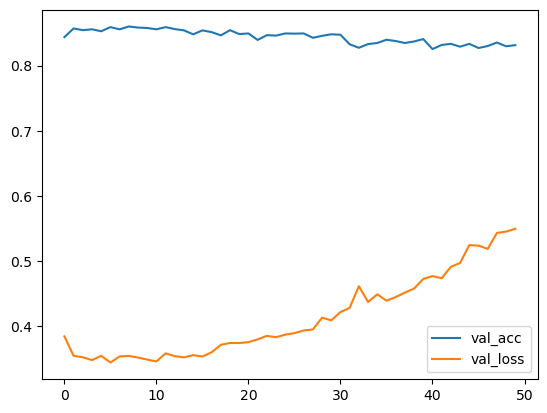

In [139]:
%matplotlib inline
import matplotlib.pyplot as plt #for plotting curves
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Predicting on Test Data


In [140]:
# y_pred = model.predict_classes(X_test)


* he predict_classes method has been removed from TensorFlow and Keras since TensorFlow 2.6. 
* Instead, you can achieve the same functionality using the following approach:
* 
* Use model.predict(X_test) to get the predicted probabilities for each class.
* Convert these probabilities to class predictions using np.argmax.


In [141]:
X_test

array([[-0.19171334, -1.09598752, -0.66001848, ..., -1.40093772,
        -0.57873591,  1.74273971],
       [ 0.13938348,  0.91241915,  1.81917487, ..., -0.68169508,
        -0.57873591, -0.57380915],
       [-0.17101979,  0.91241915, -0.18325053, ...,  1.16405884,
         1.72790383, -0.57380915],
       ...,
       [-0.91598764, -1.09598752, -1.13678644, ..., -1.25119442,
        -0.57873591, -0.57380915],
       [ 1.47411755,  0.91241915, -1.32749362, ..., -1.5564985 ,
        -0.57873591,  1.74273971],
       [-1.92997166,  0.91241915, -0.56466489, ..., -1.67595015,
         1.72790383, -0.57380915]])

In [142]:
# Get the predicted probabilities for each class
y_pred_prob = model.predict(X_test)

# Convert probabilities to class predictions
import numpy as np
y_pred = np.argmax(y_pred_prob, axis=1)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


(array([2221.,  219.,  158.,  102.,  300.]),
 array([1.28565958e-08, 2.00000003e-01, 4.00000006e-01, 6.00000024e-01,
        8.00000012e-01, 1.00000000e+00]),
 <BarContainer object of 5 artists>)

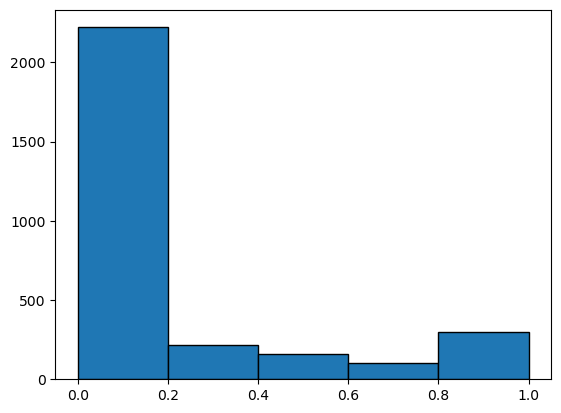

In [143]:
plt.hist(y_pred_prob, bins=5, edgecolor='black')
# plt.hist(y_pred, bins=5, edgecolor='black')


* Here the value of 1 at any index value indicates that the customer is going to leave the bank, 
* and the value of 0 indicates that the bank has retained the customer

# Confusion Matrix


In [144]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)
cf

array([[2385,    0],
       [ 615,    0]], dtype=int64)

In [145]:
# !pip install mlxtend


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

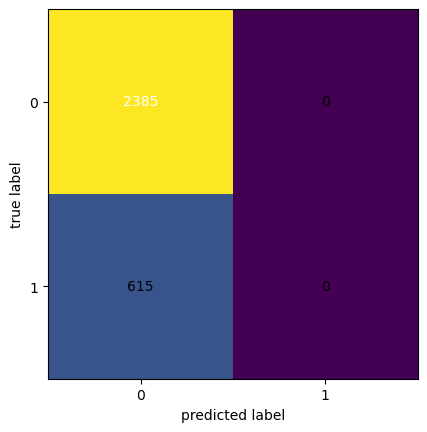

In [146]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(conf_mat=cf, cmap=plt.cm.viridis)


In [147]:
# accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.795

# Predicting on Unseen Data


#### So, for our unseen test data, we will use the following values:
* CreditScore = 615
* Gender = Male
* Age = 22
* Tenure = m5
* Balance = 20000
* NumOfProducts = 1
* HasCrCard = 1
* IsActiveMember = 1
* EstimatedSalary = 60000
* Geography = Spain

In [148]:
customer = model.predict(np.array([[615, 1, 22, 5, 20000, 5, 1, 1, 60000, 0, 0]]))

if customer[0] == 1:
    print ("Customer is likely to leave")
else:
    print ("Customer will stay")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Customer will stay
